In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/wheat_yield_faostat_clean.csv")
df.head()

,country,year,yield_kg_ha
0,Afghanistan,1961,102.20
1,Afghanistan,1962,97.35
2,Afghanistan,1963,83.17
3,Afghanistan,1964,95.10
4,Afghanistan,1965,97.23


In [2]:
df.shape, df["country"].nunique(), df["year"].min(), df["year"].max()

((7137, 3), 133, np.int64(1961), np.int64(2024))

In [3]:
df["low_yield"] = (
    df.groupby("country")["yield_kg_ha"]
      .transform(lambda x: x <= x.quantile(0.25))
      .astype(int)
)

df[["country", "year", "yield_kg_ha", "low_yield"]].head(10)

,country,year,yield_kg_ha,low_yield
0,Afghanistan,1961,102.20,1
1,Afghanistan,1962,97.35,1
2,Afghanistan,1963,83.17,1
3,Afghanistan,1964,95.10,1
4,Afghanistan,1965,97.23,1
5,Afghanistan,1966,86.66,1
6,Afghanistan,1967,112.32,0
7,Afghanistan,1968,115.62,0
8,Afghanistan,1969,118.55,0
9,Afghanistan,1970,95.63,1


In [4]:
counts = df["low_yield"].value_counts()
rates = df["low_yield"].value_counts(normalize=True)

counts, rates

(low_yield
 0    5296
 1    1841
 Name: count, dtype: int64,
 low_yield
 0    0.742048
 1    0.257952
 Name: proportion, dtype: float64)

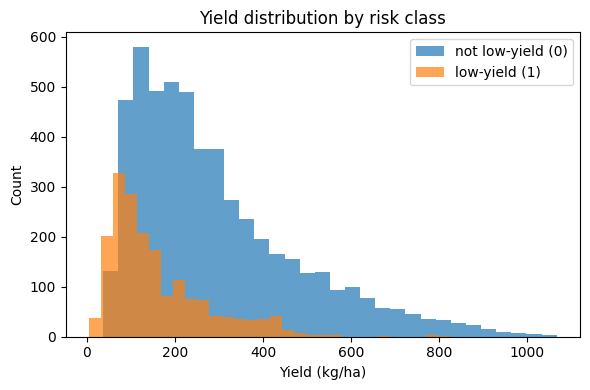

In [5]:
plt.figure(figsize=(6,4))
plt.hist(df.loc[df["low_yield"]==0, "yield_kg_ha"], bins=30, alpha=0.7, label="not low-yield (0)")
plt.hist(df.loc[df["low_yield"]==1, "yield_kg_ha"], bins=30, alpha=0.7, label="low-yield (1)")
plt.xlabel("Yield (kg/ha)")
plt.ylabel("Count")
plt.title("Yield distribution by risk class")
plt.legend()
plt.tight_layout()
plt.show()

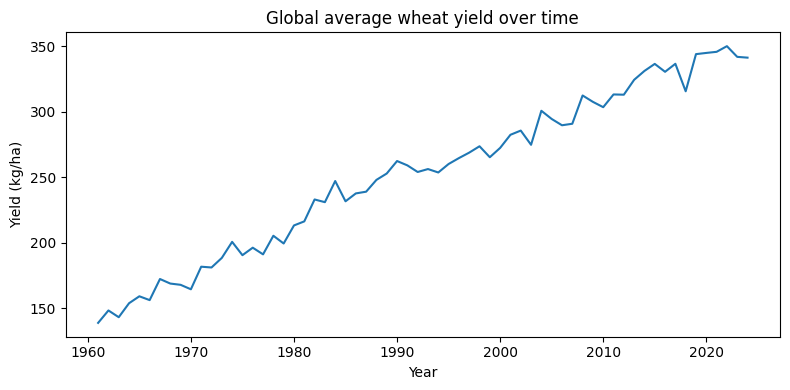

In [6]:
avg_by_year = df.groupby("year")["yield_kg_ha"].mean()

plt.figure(figsize=(8,4))
plt.plot(avg_by_year)
plt.title("Global average wheat yield over time")
plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")
plt.tight_layout()
plt.show()

In [7]:
plt.figure(figsize=(6,4))
plt.hist(df.loc[df["low_yield"]==0, "yield_kg_ha"], bins=30, alpha=0.7, label="0")
plt.hist(df.loc[df["low_yield"]==1, "yield_kg_ha"], bins=30, alpha=0.7, label="1")
plt.title("Yield distribution by risk class")
plt.tight_layout()
plt.savefig("../outputs/figures/yield_by_risk_class.png")
plt.close()

In [8]:
df.to_csv("../data/wheat_yield_faostat_labeled.csv", index=False)